# Plotting SEM images with insets all in one

In [2]:
from skimage import data, io, util, segmentation, color, draw, filters, exposure, img_as_float
import numpy as np
from scipy import ndimage
%matplotlib nbagg
import matplotlib
from matplotlib import cm
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from PIL import Image
import os 
import sys
import cv2
import pytesseract
from skimage import exposure


debug = True #or 'False' when you do not want to debug

path = "/Users/sfiligoj/Google Drive/Crispies/Ru/Plots/SEM/all_T/low"
os.chdir(path)
filess= os.listdir()
filess = [f for f in os.listdir(path) if f.endswith('tif')]

Plotting file: L_700C_1um_050.tif


<IPython.core.display.Javascript object>


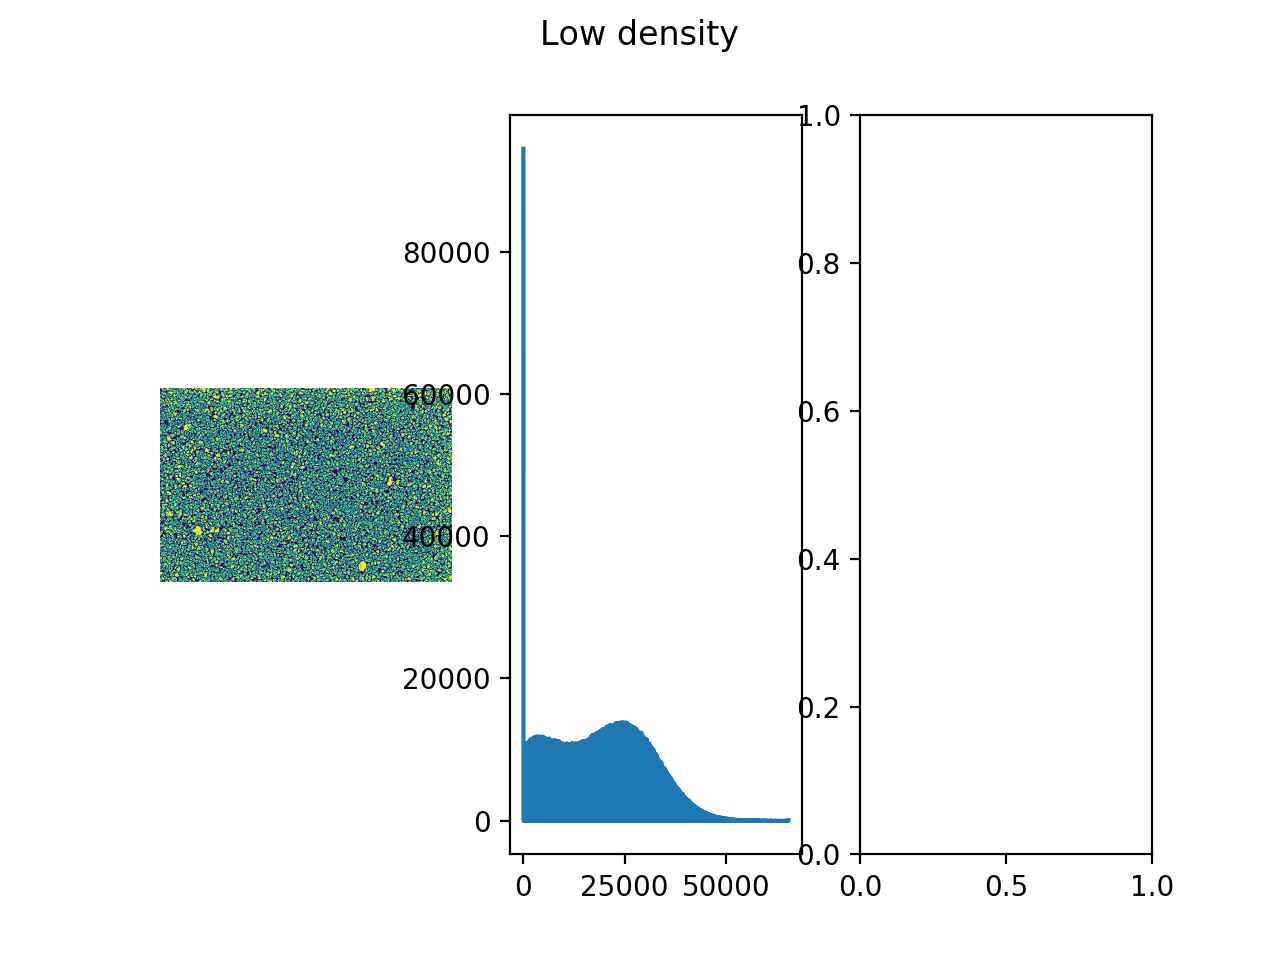

Plotting file: L_600C_021.tif


<IPython.core.display.Javascript object>


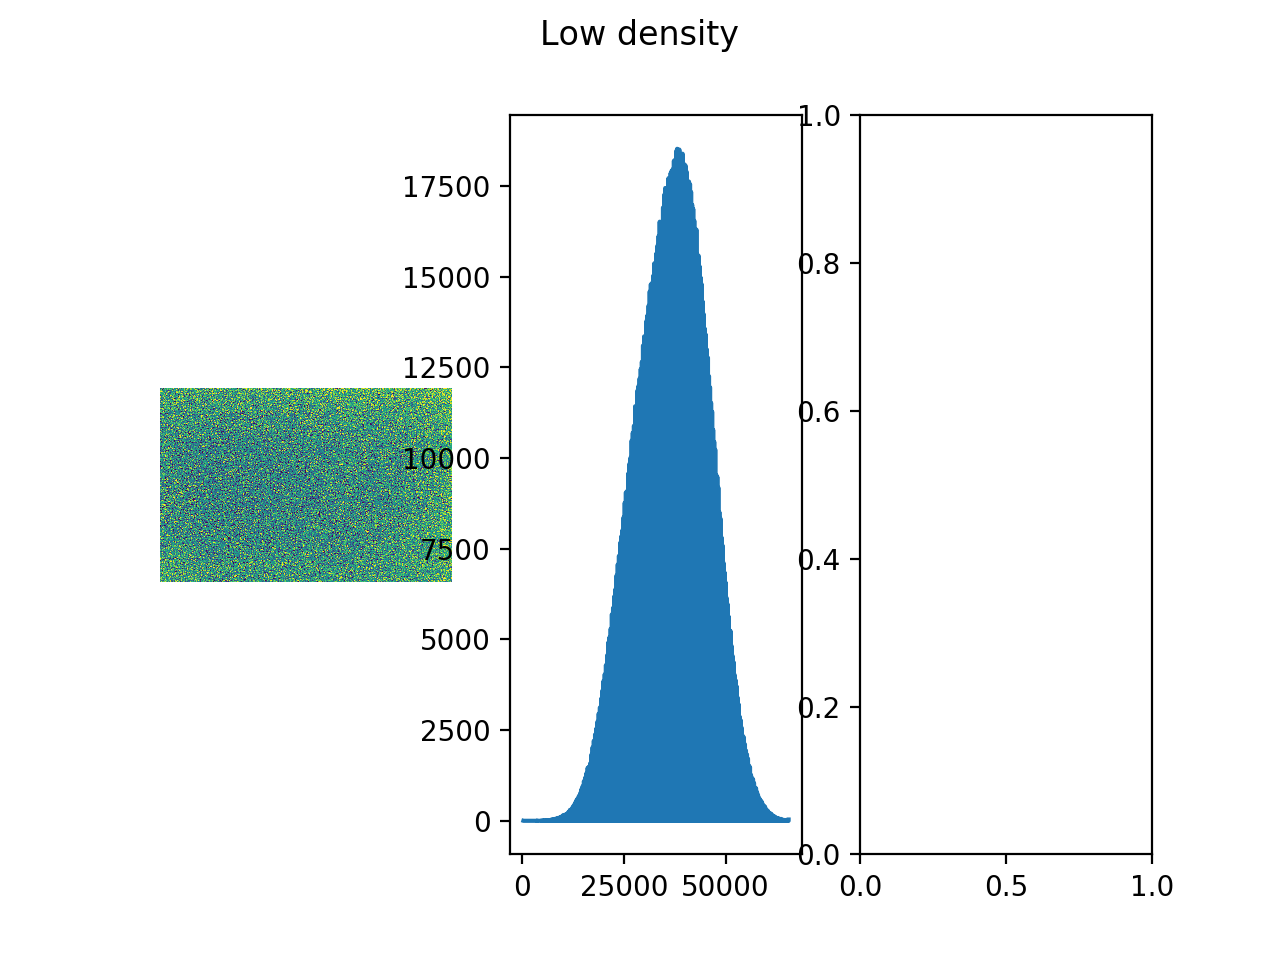

Plotting file: L_500C_017.tif


<IPython.core.display.Javascript object>


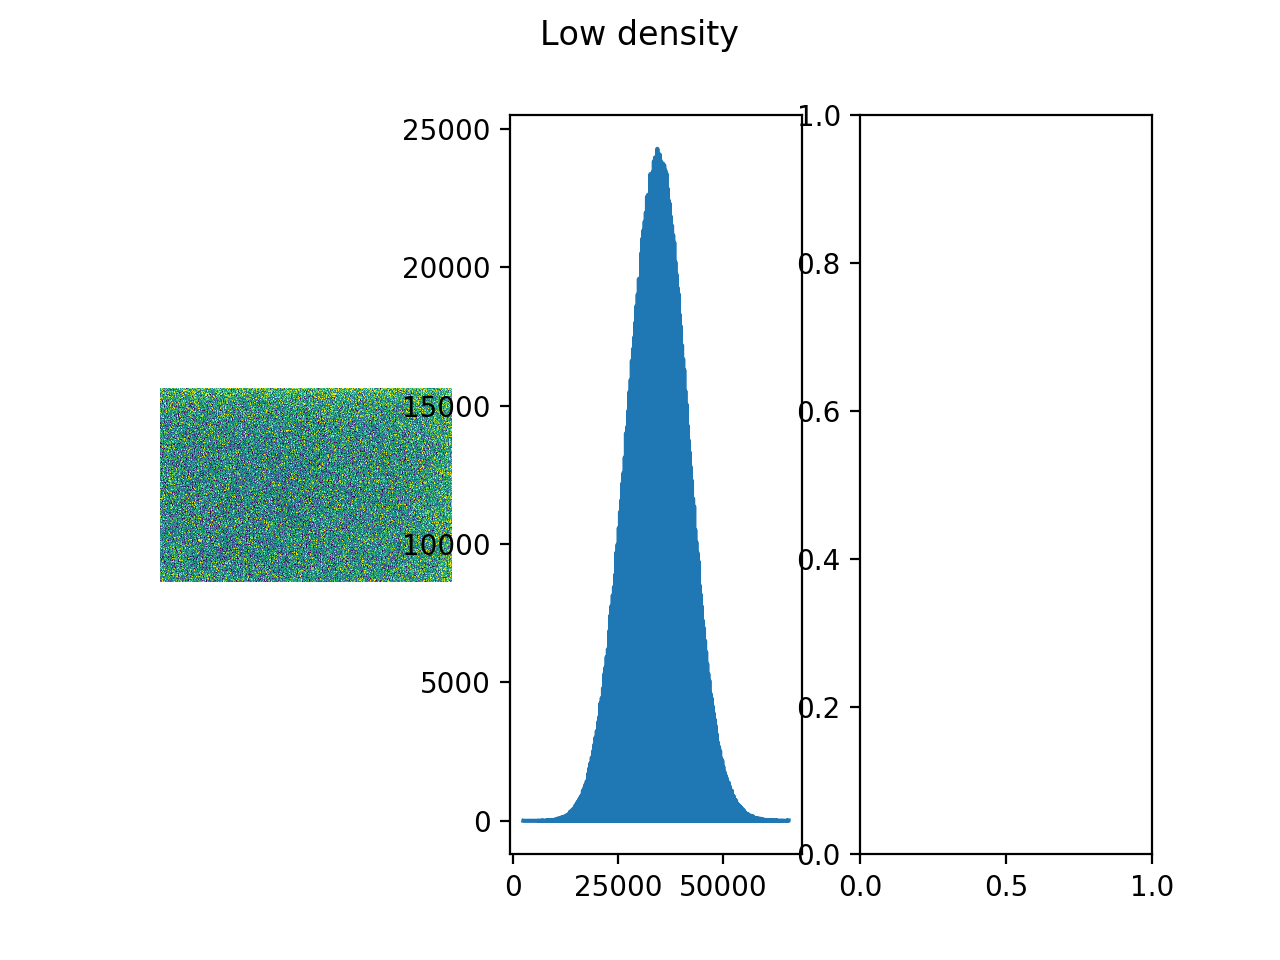

Plotting file: L_800C_025.tif


<IPython.core.display.Javascript object>


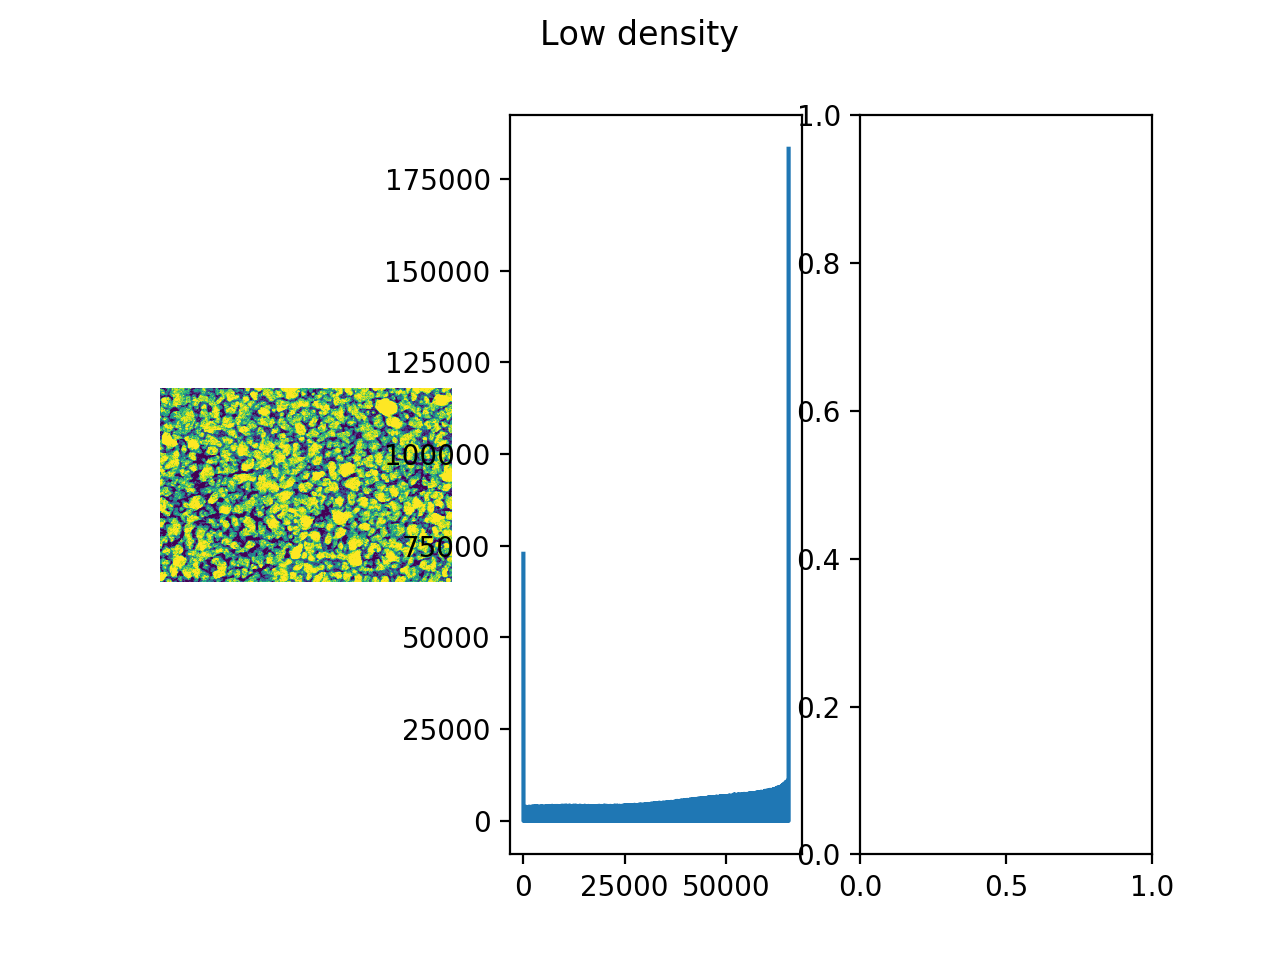

Plotting file: L_250C_012.tif


<IPython.core.display.Javascript object>


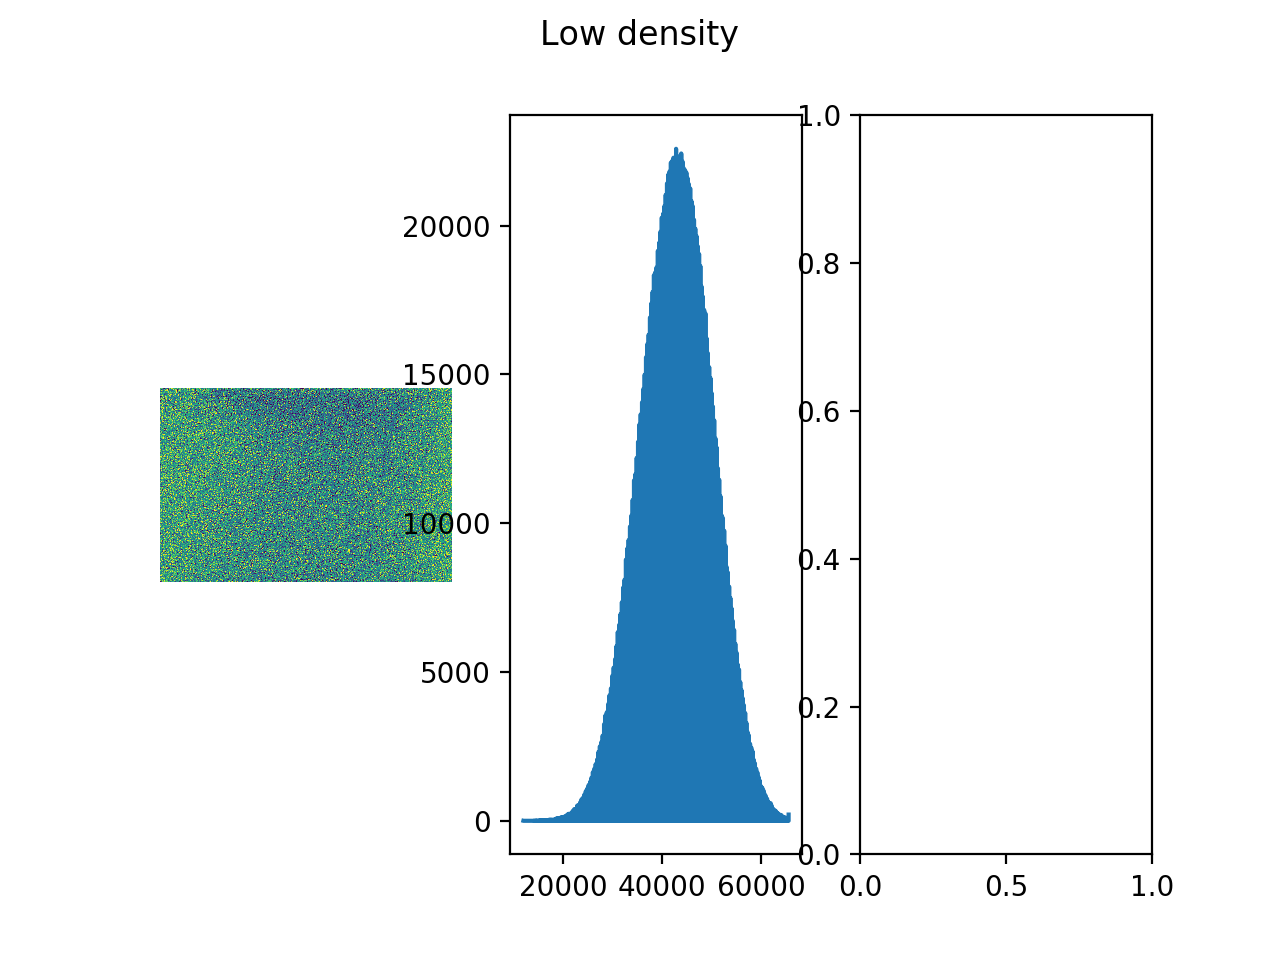

In [3]:
for file in filess[:]:
    print(f"Plotting file: {file}")
    
    if 'L_' in file:
        density = 'Low'
    elif 'LH_' in file:
        density = 'Low-High'
    elif 'H_' in file:
        density = 'High'
    
    img = io.imread(file, as_gray=True)
    img = img[:1024,:]
    
    hist, bins = exposure.histogram(img)   
       
    p2 = np.percentile(img,2)
    p98= np.percentile(img,98)
    img_stretching = exposure.rescale_intensity(img, in_range=(p2,p98))
    
    fig, ax = plt.subplots(ncols=3)
    
    ax[0].imshow(img_stretching, cmap='viridis')
    ax[0].axis('off')
    
    ax[1].plot(bins, hist)   

    fig.suptitle(f'{density} density')
        
    fname = f'{file[:-4]}_stretched_with_Hist'
    
    fname_png = f'{fname}.png'
    
    save_path = "/Users/sfiligoj/Google Drive/Crispies/Ru/Plots/SEM/all_T/low/stretched"
    
    plt.savefig(os.path.join(save_path,fname_png),dpi=800)
